In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl (284.2 MB)


In [7]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.7.22
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.44.0
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.59.2
h5py                         3.10.0
idna                         3.4
ipykernel                    6.26.0
ipython                      8.17.2
jedi                         0.19.1
jupyter_client               8.6.0
ju

In [4]:
import tensorflow as tf
import os

In [5]:
os.getcwd()

'C:\\Users\\Binal Weerasena\\OneDrive\\Desktop\\Data Science\\Deep Learning\\ImageSentimentProject'

In [6]:
os.listdir('C:\\Users\\Binal Weerasena\\OneDrive\\Desktop\\Data Science\\Deep Learning\\ImageSentimentProject\\data')

['happy', 'sad']

***To interpret on GPU make sure to change hardware accelerator to T4 GPU at Runtime-->Change Runtime Type. Otherwise you will not find any GPU devices from the following prompt.***

***When running on a local machine, this is a different procedure.Have to configure 'CUDA' 'CUDNn' of Nvidea matching with 'TensorFlow' package***

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9613436978787921723
xla_global_id: -1
]


In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0:
    print("We got a GPU")
    print(gpus[0])
else:
    print("Sorry, no GPU for you...")

Sorry, no GPU for you...


***If memory growth is enabled for a PhysicalDevice, the runtime initialization will not allocate all memory on the device. Memory growth cannot be configured on a PhysicalDevice with virtual devices configured.
Avoid Out of Memory(OOM) errors by setting GPU memory consumption growth.***

***In order to get image data from the World Wide Web, I searched for happy people and sad people on Google images and downloaded them using a Google extension called 'Download all images' which downloads them in a .zip file.***

***Removed out all the images below 10KB***

***Now we will try to clean up the dodgy images.***


In [10]:
import cv2
import imghdr

In [12]:
data_dir='C:\\Users\\Binal Weerasena\\OneDrive\\Desktop\\Data Science\\Deep Learning\\ImageSentimentProject\\data'
image_extensions=['jpeg','jpg','png','bmp']

In [13]:
os.listdir(data_dir)

['happy', 'sad']

In [14]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_38064890_H0vhLXPugCMaxRnEzXtASpmml1NKhqrp.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '427394C200000578-0-image-a-24_1500384481554.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '61ftZLihnpL._UX250_.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 'AKPQZvydLqOWjV5L45aXnenu9ze1FoqI2SGCcWh1MffJxQs64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'compassion.jpg',
 'dv2051009.jpg',
 'e

In [15]:
for images_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,images_class)):
    image_path=os.path.join(data_dir,images_class,image)
    try:
      img=cv2.imread(image_path)
      trunk=imghdr.what(image_path)
      if trunk not in image_extensions:
        print('Image not in Extensions list')
        os.remove(image_path)
    except Exception as e:
      print('Issue with image extension')

Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list
Image not in Extensions list


***The tf.data API enables you to build complex input pipelines from simple, reusable pieces. For example, the pipeline for an image model might aggregate data from files in a distributed file system, apply random perturbations to each image, and merge randomly selected images into a batch for training.***

***The tf.data API makes it possible to handle large amounts of data, read from different data formats, and perform complex transformations.***

In [16]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [17]:
import numpy as np
import matplotlib.pyplot as plt

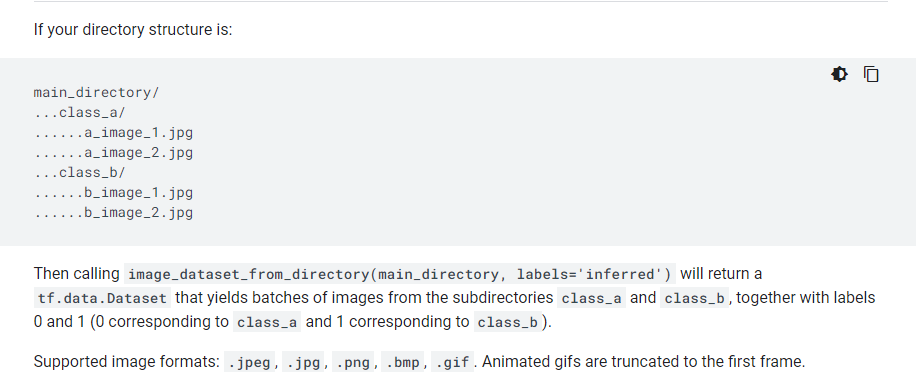

In [18]:
data=tf.keras.utils.image_dataset_from_directory('C:\\Users\\Binal Weerasena\\OneDrive\\Desktop\\Data Science\\Deep Learning\\ImageSentimentProject\\data')

Found 386 files belonging to 2 classes.


In [19]:
data_iterator=data.as_numpy_iterator()

In [20]:
batch=data_iterator.next()

In [21]:
batch[0].shape

(32, 256, 256, 3)

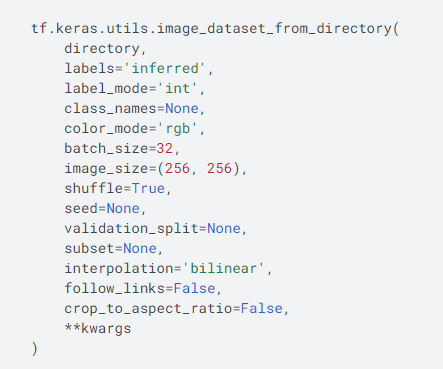

***Batch size of 32 is declared in tf.keras.utils.image_dataset_from_directory. You can change this explicitly using the above arguments.***

***Image size can also be changed. Default is (256,256)***

In [22]:
batch[1]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

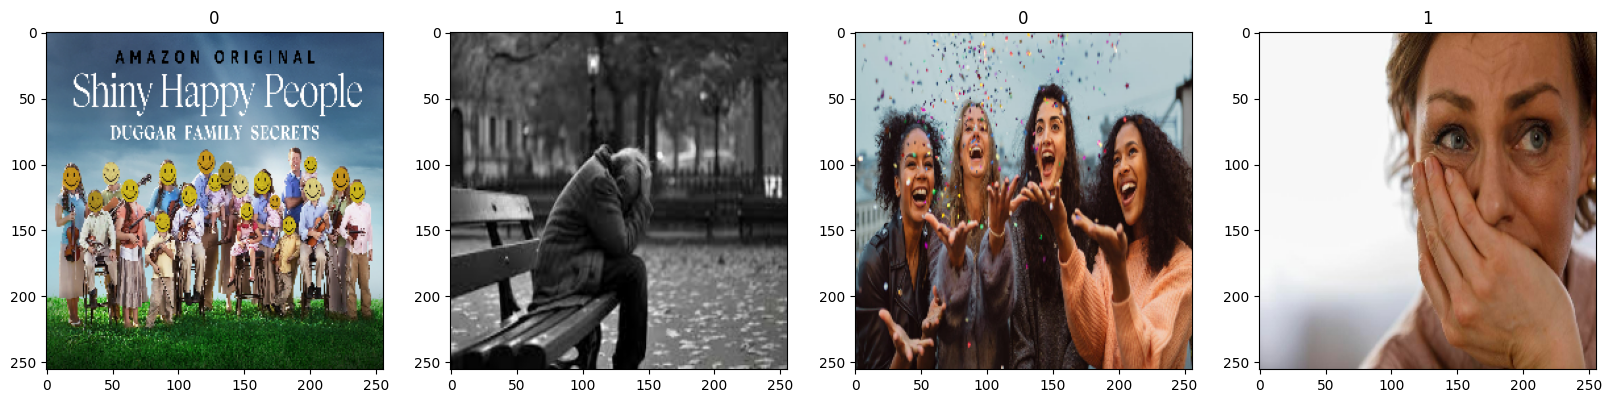

In [23]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for index,img in enumerate(batch[0][:4]):
  ax[index].imshow(img.astype(int))
  ax[index].title.set_text(batch[1][index])

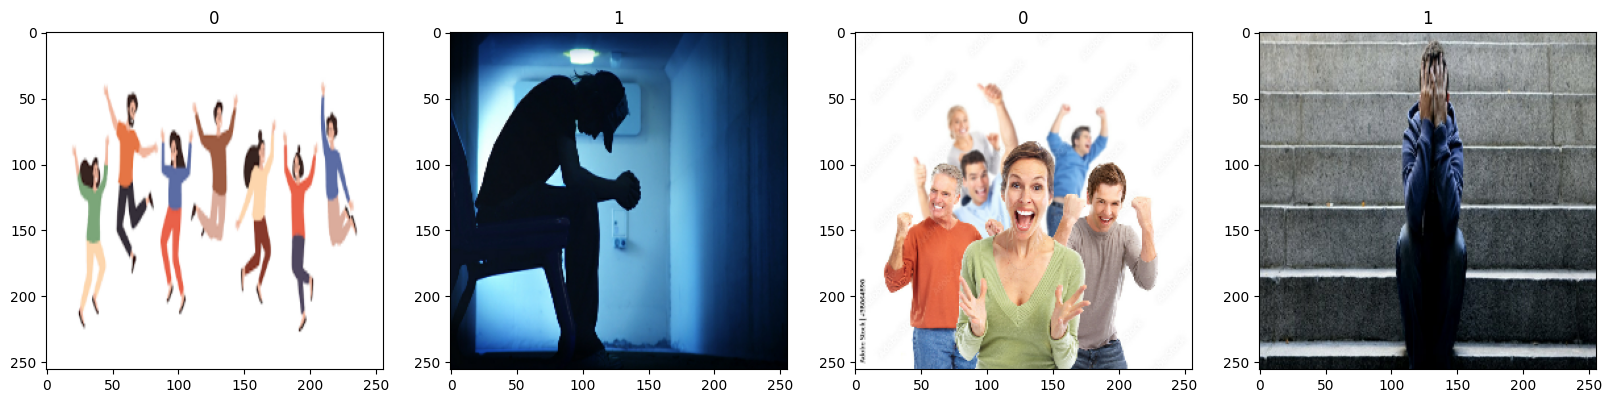

In [24]:
batch=data_iterator.next() #Iterating the next batch of data, just to check
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for index,img in enumerate(batch[0][:4]):
  ax[index].imshow(img.astype(int))
  ax[index].title.set_text(batch[1][index])

Class 1 = Happy People

Class 2 = Sad People

##Preprocess Data

In [25]:
batch[0].max()

255.0

In [26]:
(batch[0]/255).max()

1.0

***Data in the dataset has a maximum value of 255. Minimum being 0.***

***We need to scale this into 0-1. It's a good practise.***

In [27]:
data=data.map(lambda x,y: (x/255,y))

In [28]:
scaled_iterator=data.as_numpy_iterator()

In [29]:
batch=scaled_iterator.next()
batch[0].max()

1.0

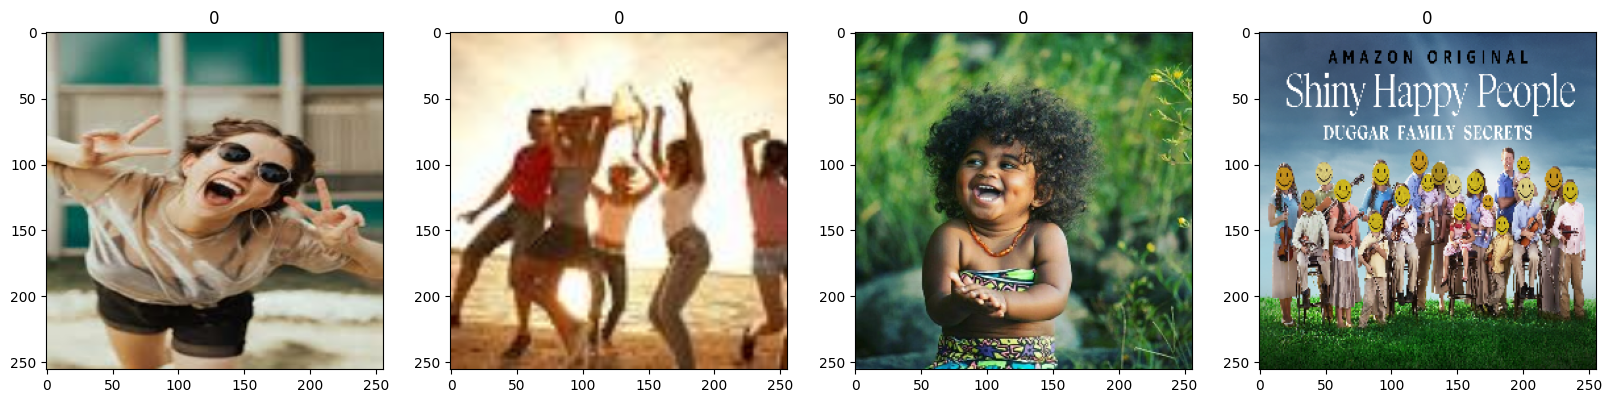

In [30]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for index,img in enumerate(batch[0][:4]):
  ax[index].imshow(img)
  ax[index].title.set_text(batch[1][index])

In [31]:
len(data) #Remember this is the number of batches of size 32

13

In [32]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)+1

print(train_size,val_size,test_size)

9 2 2


***Added 1 in order to prevent test_size being 0.***

In [33]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

##Deep Learning Model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [40]:
model=Sequential()

In [41]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [43]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [45]:
logdir='logs'

In [46]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 21s 2s/step - loss: 0.7836 - accuracy: 0.5799 - val_loss: 0.6558 - val_accuracy: 0.7500
Epoch 2/20
9/9 [==============================] - 17s 2s/step - loss: 0.6099 - accuracy: 0.6875 - val_loss: 0.5060 - val_accuracy: 0.7031
Epoch 3/20
9/9 [==============================] - 18s 2s/step - loss: 0.4635 - accuracy: 0.7847 - val_loss: 0.3960 - val_accuracy: 0.8594
Epoch 4/20
9/9 [==============================] - 18s 2s/step - loss: 0.3881 - accuracy: 0.8264 - val_loss: 0.3467 - val_accuracy: 0.8594
Epoch 5/20
9/9 [==============================] - 16s 2s/step - loss: 0.2834 - accuracy: 0.8750 - val_loss: 0.1949 - val_accuracy: 0.9375
Epoch 6/20
9/9 [==============================] - 17s 2s/step - loss: 0.1996 - accuracy: 0.9201 - val_loss: 0.2412 - val_accuracy: 0.8906
Epoch 7/20
9/9 [==============================] - 17s 2s/step - loss: 0.1423 - accuracy: 0.9653 - val_loss: 0.1205 - val_accuracy: 0.9688
Epoch 8/20
9/9 [==================

In [48]:
hist.history

{'loss': [0.7836315035820007,
  0.6099057793617249,
  0.46347135305404663,
  0.38813769817352295,
  0.28341010212898254,
  0.19964930415153503,
  0.14229440689086914,
  0.0992622897028923,
  0.07474252581596375,
  0.045937590301036835,
  0.029939791187644005,
  0.0258619524538517,
  0.021218864247202873,
  0.01676969788968563,
  0.02852592244744301,
  0.014283384196460247,
  0.016040345653891563,
  0.011739779263734818,
  0.020167896524071693,
  0.011223362758755684],
 'accuracy': [0.5798611044883728,
  0.6875,
  0.7847222089767456,
  0.8263888955116272,
  0.875,
  0.9201388955116272,
  0.9652777910232544,
  0.9791666865348816,
  0.9756944179534912,
  0.9930555820465088,
  0.9930555820465088,
  0.9895833134651184,
  0.9930555820465088,
  0.9965277910232544,
  0.9930555820465088,
  0.9965277910232544,
  0.9965277910232544,
  0.9965277910232544,
  0.9930555820465088,
  0.9965277910232544],
 'val_loss': [0.655761182308197,
  0.5059521198272705,
  0.3959958851337433,
  0.3466747999191284,


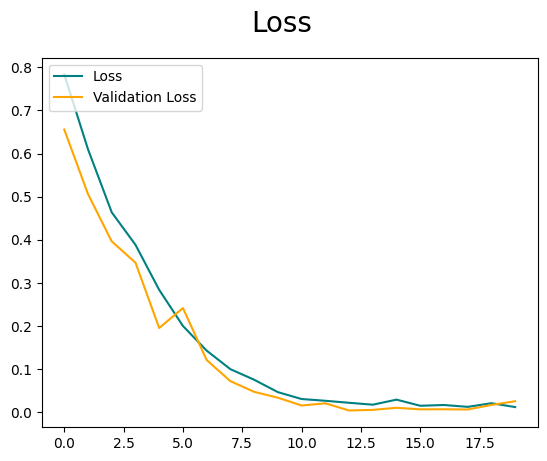

In [50]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation Loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

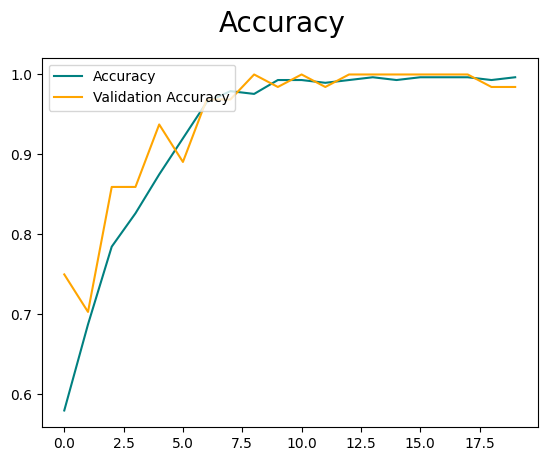

In [51]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation Accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [52]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [53]:
precision=Precision()
recall=Recall()
bin_accuracy=BinaryAccuracy()

In [54]:
len(test)

2

In [55]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    precision.update_state(y,yhat)
    recall.update_state(y,yhat)
    bin_accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 143ms/step


In [56]:
print(f'Precision: {precision.result()} Recall:{recall.result()} Binary Accuracy:{bin_accuracy.result()}')

Precision: 1.0 Recall:1.0 Binary Accuracy:1.0
